# DECISION TREE 

Importing useful libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz as gv
import seaborn as sns
import matplotlib.pyplot as plt

Loading data

In [2]:
data = pd.read_csv('descision_tree_bill.csv')
data.head()     #extracting topmost 5 rows from data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.shape  #gives shape of data

(1372, 5)

# Feature Extraction
Extracting features and target as X and y respectively

In [6]:
X = data.drop('Class',axis=1)
y = data.Class

In [7]:
col = X.columns    #contains columns of data

# Splitting Data
Splitting data into training and testing datasets

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify = y)

# DECISION TREE CLASSIFICATION MODEL
Preparing Decision Tree Classification model and fitting the model using training datasets

In [9]:
model_tree = DecisionTreeClassifier()
tree_classifier = model_tree.fit(X_train,y_train)

# Model Score

In [10]:
print(model_tree.score(X_train,y_train))
print(model_tree.score(X_test,y_test))

1.0
0.9830097087378641


# The model is Overfit!
Overfitting occurs when the model performs very good at the training dataset but not in case of testing dataset. One of the major cause of overfitting could be wrong feature selection.

This could be resolve in this way...

# Feature Selection
Selecting most prominant featrues from the dataset

In [11]:
from sklearn.feature_selection import SelectFromModel

decision_model = SelectFromModel(DecisionTreeClassifier())
decision_model.fit(X,y)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort=False,
                                                 random_state=None,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [12]:
model_columns = decision_model.get_support()  
features = X.columns[model_columns]    #most prominant features

# Feature Extraction 
Extracting the most prominant features we got from decision_model

In [13]:
tree_X = data[features]
model_columns = tree_X.columns
tree_y = data['Class']

# Splitting Data
Splitting data into training and testing datasets from the newly formed dependent and independent variables

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tree_X, tree_y, test_size = 0.3, random_state = 42)

# DECISION TREE CLASSIFICATION MODEL
Preparing Decision Tree Classification model again and fitting the model with new training datasets

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Prediction

In [18]:
clf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,

# Model Score

In [19]:
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.7766990291262136
0.9989583333333333


# Tree Plot 1
Plotting the final Decision Tree model 

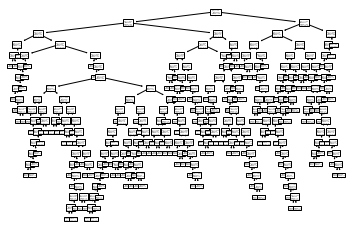

In [20]:
tree.plot_tree(clf)
plt.show()

# Tree Plot 2
Plotting the final Decision Tree model in more visualized way using graphic library

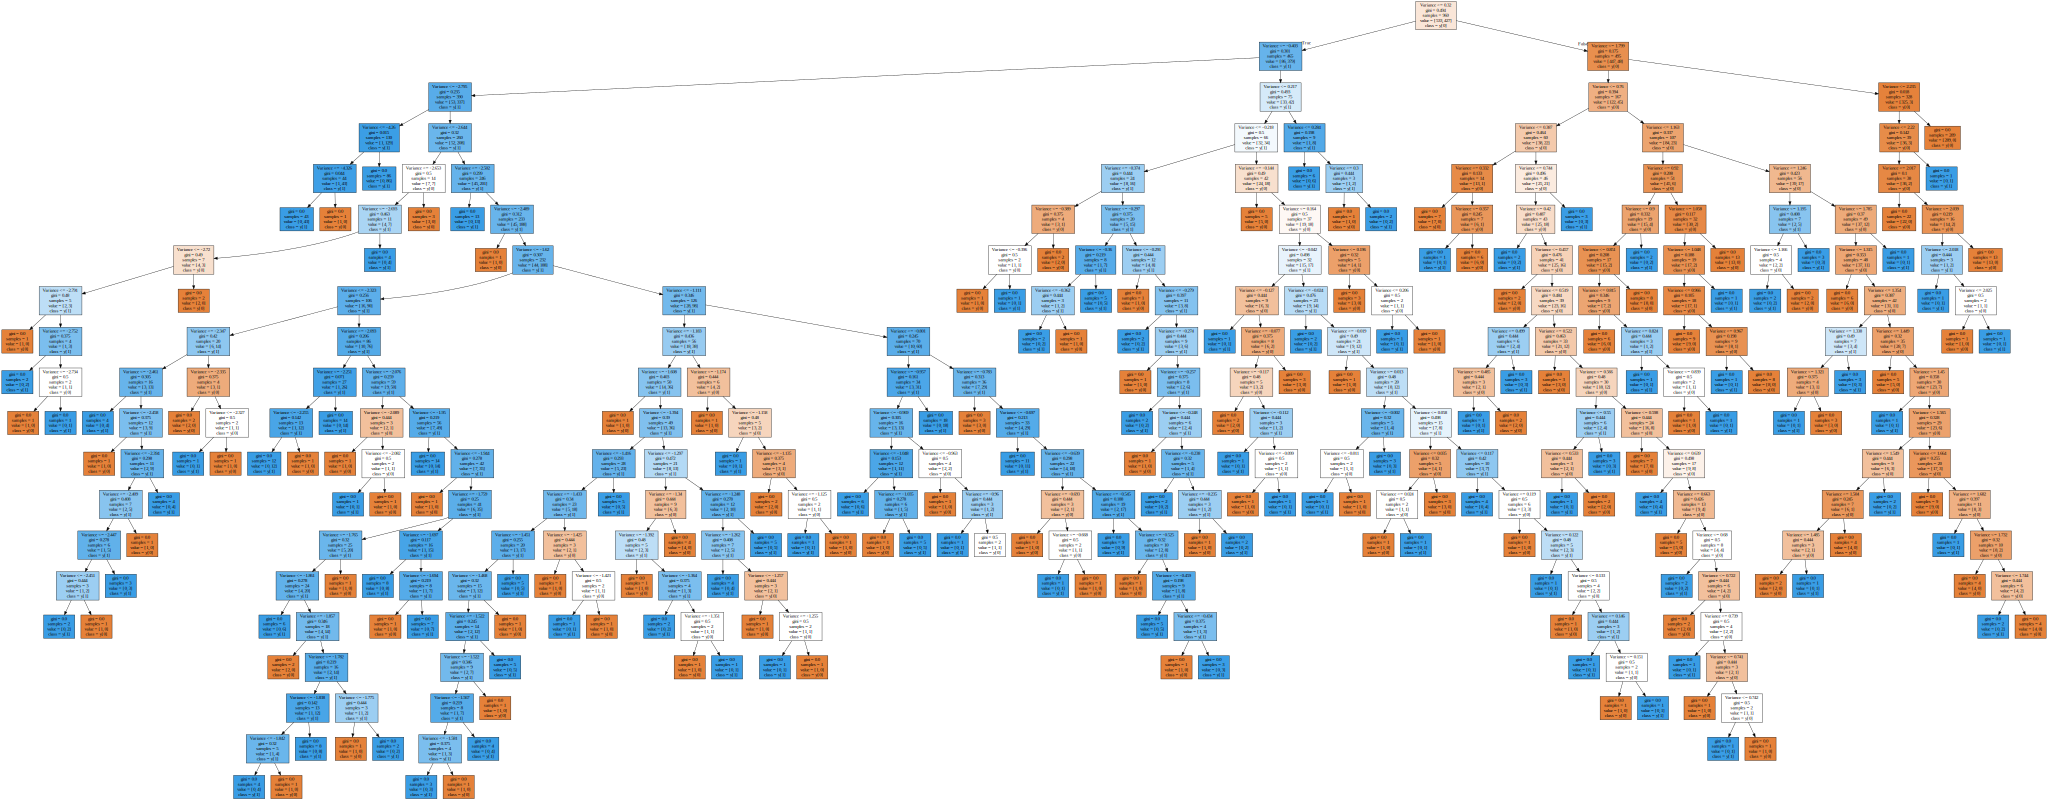

In [21]:
viz_data = tree.export_graphviz(clf,feature_names=model_columns, filled = True,class_names=True,rotate=False)
graph = gv.Source(viz_data)
graph